In [1]:
from scipy.stats import mode
import numpy as np
#from mnist import MNIST
from time import time
import pandas as pd
import os
import matplotlib.pyplot as matplot
import matplotlib
%matplotlib inline

import random
matplot.rcdefaults()
from IPython.display import display, HTML
from itertools import chain
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sb
from sklearn.model_selection import ParameterGrid
from sklearn.svm import SVC, LinearSVC
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import fetch_openml
digits = fetch_openml("mnist_784")

Classification report for classifier SVC(gamma=0.001, max_iter=500, random_state=623):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       0.98      1.00      0.99        95
           2       1.00      0.99      0.99        83
           3       0.99      1.00      0.99        93
           4       0.99      0.99      0.99        72
           5       0.98      0.99      0.98        92
           6       1.00      1.00      1.00       100
           7       0.98      1.00      0.99        84
           8       0.99      0.96      0.97        93
           9       0.99      0.97      0.98       103

    accuracy                           0.99       899
   macro avg       0.99      0.99      0.99       899
weighted avg       0.99      0.99      0.99       899


Confusion matrix:
[[ 84   0   0   0   0   0   0   0   0   0]
 [  0  95   0   0   0   0   0   0   0   0]
 [  0   0  82   0   0   0   0   1   0   0]
 [  0 

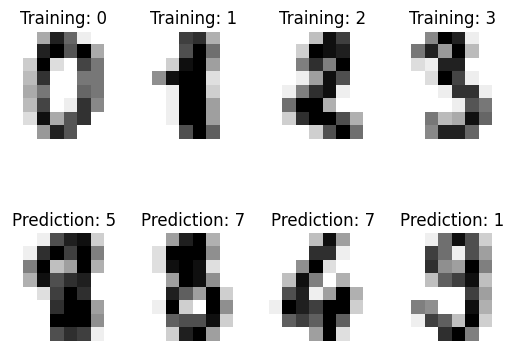

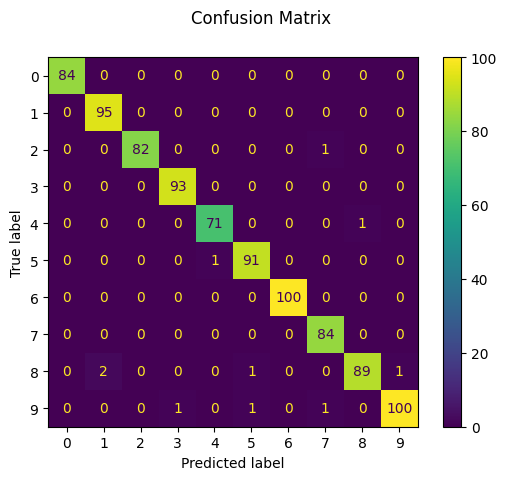

CPU times: user 2.91 s, sys: 750 ms, total: 3.66 s
Wall time: 5.28 s


In [3]:
%%time
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: {}' .format(label))

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001, random_state=623, max_iter = 500)

# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=True)

# We learn the digits on the first half of the digits
classifier.fit(X_train, y_train)

# Now predict the value of the digit on the second half:
predicted = classifier.predict(X_test)

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: {}' .format(prediction))

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n{}"  .format(disp.confusion_matrix))

plt.show()